<a href="https://colab.research.google.com/github/Oviing/nlp/blob/main/sarcasm_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gensim.models import Word2Vec
import gensim.downloader

import seaborn as sns

from sklearn.model_selection import train_test_split

Load data

In [ ]:
train = pd.read_csv('/content/train_reddit-3.csv')

In [ ]:
train.head()

,comment,subreddit,label
0,Jesus -PRON- live,AdviceAnimals,0
1,CNN Staff Sick Wall - - Wall Trump Coverage,POLITIC,0
2,agree -PRON- mean gujrat husband good suspect ...,india,0
3,guy tell -PRON- -PRON- use social medium -PRON...,AskWomen,0
4,2011 BMW Z4 GT3,carporn,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808660 entries, 0 to 808659
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   comment    806172 non-null  object
 1   subreddit  808660 non-null  object
 2   label      808660 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 18.5+ MB


In [ ]:
train.tail()

,comment,subreddit,label
808655,swedish Delight unsponsored -PRON- entire 2016...,smashbros,1
808656,hey Reddit -PRON- drink flavor juice rest -PRO...,AskReddit,0
808657,-PRON- sure -PRON- pay -PRON- insurance place ...,cars,0
808658,-PRON- subscribe lot time poster creepy pm -PR...,AskReddit,0
808659,-PRON- different oil -PRON- know dozen food co...,worldnews,0


In [ ]:
train.head()

,comment,subreddit,label
0,Jesus -PRON- live,AdviceAnimals,0
1,CNN Staff Sick Wall - - Wall Trump Coverage,POLITIC,0
2,agree -PRON- mean gujrat husband good suspect ...,india,0
3,guy tell -PRON- -PRON- use social medium -PRON...,AskWomen,0
4,2011 BMW Z4 GT3,carporn,1


In [ ]:
comments = train['comment'].values.tolist()

In [ ]:
comments_string = []
for i in range(0, len(comments)):
  comments_string.append(str(comments[i]))

In [ ]:
np.unique(train['label'])

array([0, 1])

Word embedding

In sarcasm the meaning of a word changes. Therefore it makes sense to use custom embedding so the different meaning is taken into account

In [ ]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
filters='-PRON-'

In [ ]:
def preprocess(X):
  token_list = []
  for sentence in X:

    x = tf.keras.preprocessing.text.text_to_word_sequence(sentence, filters = filters, lower=True, split=' ')
    token_list.append(x)
    
  return token_list

In [ ]:
w2v_token_list = preprocess(comments_string)

In [ ]:
w2v_token_list[0]

['jesus', 'pron', 'live']

Count the number of tokens

In [ ]:
n_token = []
for i in range(0 , len(w2v_token_list)):
  lenght = len(w2v_token_list[i])
  n_token.append(lenght)

In [ ]:
h = np.histogram(n_token)

(array([455866., 207215.,  68041.,  30362.,  15790.,   9099.,   5832.,
          3875.,   2699.,   2187.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

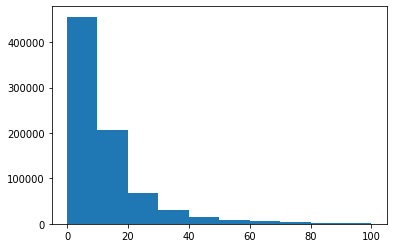

In [ ]:
plt.hist(n_token, range = [0, 100])

We are building a Word2Vec model with a window size of 5. The embedding dimension is 50

In [ ]:
w2v = Word2Vec(sentences=w2v_token_list, 
               size=50, window=5, min_count=1, 
               workers=3, iter = 20)
w2v.save("word2vec_50.model")

In [ ]:
reddit_w2v = Word2Vec.load("/content/word2vec_50.model")

GloVe 50 trained on twitter . Even GloVe and Word2Vec are different, since GloVe is using global information, while Word2Vec relies just on local information we are comparing W2V with GloVe. We do it because the GloVe was trained on twitter, where we hope that the writting style is more similar to reddit than for example Word2Vec trained on google news

In [ ]:
glove = gensim.downloader.load('glove-twitter-50')

[==================================================] 100.0% 199.5/199.5MB downloaded


We compare the similarity of some words between custom word2vec and glove

In [ ]:
reddit_w2v.wv.most_similar('sarcasm')

[('sarcastic', 0.809568464756012),
 ('punctuation', 0.7665599584579468),
 ('typo', 0.6893393397331238),
 ('sardonic', 0.67090904712677),
 ('grammar', 0.6692318916320801),
 ('misspelling', 0.6609377264976501),
 ('spelling', 0.6591582894325256),
 ('typos', 0.6579211950302124),
 ('emoticon', 0.6575927138328552),
 ('font', 0.6563110947608948)]

In [ ]:
glove.wv.most_similar('sarcasm')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('profanity', 0.7887452840805054),
 ('grammar', 0.758082926273346),
 ('stupidity', 0.7542912364006042),
 ('sarcastic', 0.7457067370414734),
 ('honesty', 0.7331408858299255),
 ('irony', 0.7225844860076904),
 ('spelling', 0.7183022499084473),
 ('correct', 0.7140311598777771),
 ('personality', 0.7095839381217957),
 ('language', 0.7088583707809448)]

In [ ]:
reddit_w2v.wv.most_similar('food')

[('meal', 0.7882431745529175),
 ('meat', 0.7852242588996887),
 ('eat', 0.7603394389152527),
 ('supermarket', 0.737467348575592),
 ('snack', 0.7319060564041138),
 ('restaurant', 0.7302890419960022),
 ('vegetable', 0.725460946559906),
 ('hamburger', 0.6996071338653564),
 ('steak', 0.695990800857544),
 ('seafood', 0.692101776599884)]

In [ ]:
glove.wv.most_similar('food')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('coffee', 0.8504894971847534),
 ('eat', 0.8481371402740479),
 ('breakfast', 0.8466012477874756),
 ('eating', 0.8367788791656494),
 ('lunch', 0.8283551931381226),
 ('junk', 0.8252913355827332),
 ('meat', 0.8209962248802185),
 ('cooking', 0.8184602856636047),
 ('dinner', 0.8173957467079163),
 ('foods', 0.8172489404678345)]

In [ ]:
reddit_w2v.wv.similarity('university', 'irony')

-0.07020188

In [ ]:
glove.wv.similarity('university', 'irony')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


0.25108966

In [ ]:
keys = ['sarcasm', 'irony', 'apple', 'food', 'computer', 'university']

def embedding_cluster_creation(model, keys):

  embedding_clusters = []
  word_clusters = []
  for word in keys:
      embeddings = []
      words = []
      for similar_word, _ in model.most_similar(word, topn=10):
          words.append(similar_word)
          embeddings.append(model[similar_word])
      embedding_clusters.append(embeddings)
      word_clusters.append(words)

  return embedding_clusters, word_clusters

In [ ]:
embedding_clusters, word_clusters = embedding_cluster_creation(reddit_w2v, keys)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [ ]:
from sklearn.manifold import TSNE

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

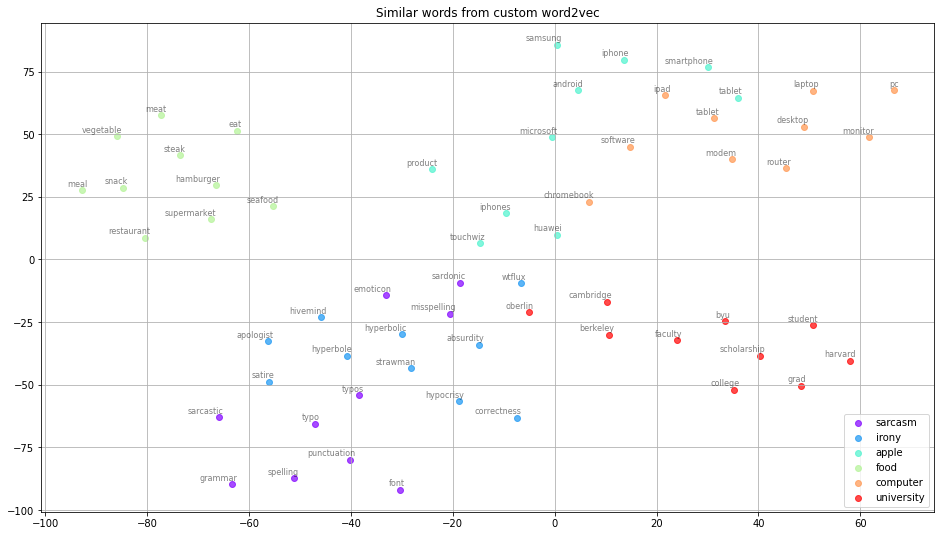

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from custom word2vec', keys, embeddings_en_2d, word_clusters, 0.7)

In [ ]:
embedding_clusters, word_clusters = embedding_cluster_creation(glove, keys)

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

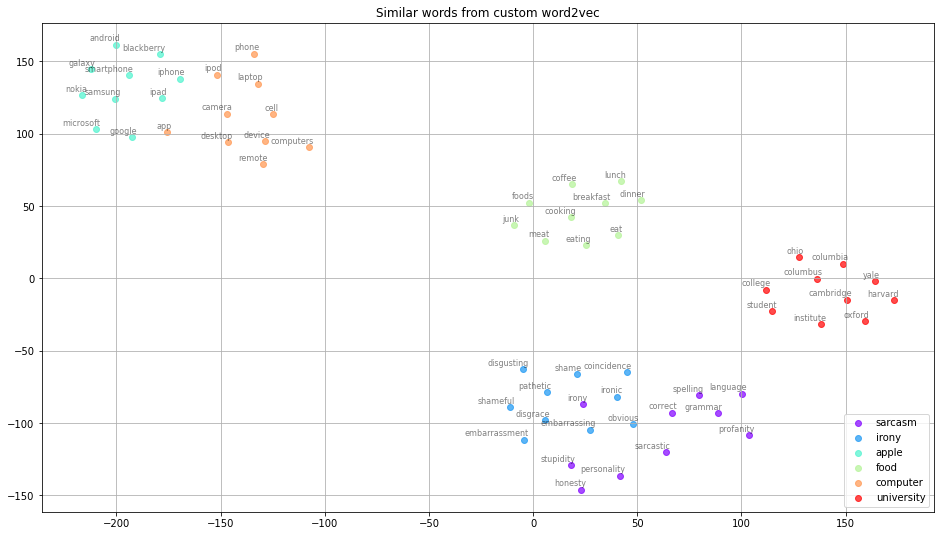

In [ ]:
tsne_plot_similar_words('Similar words from custom word2vec', keys, embeddings_en_2d, word_clusters, 0.7)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
w2v_sarcasm_mean = np.mean(embeddings_en_2d[0], axis = 1)

In [ ]:
def centeroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    return sum_x/length, sum_y/length

In [ ]:
x_cord, y_cord = centeroidnp(embeddings_en_2d[0])

In [ ]:
x_cord2, y_cord2 = centeroidnp(embeddings_en_2d[1])

In [ ]:
embeddings_en_2d[0][:, 0]

array([103.68939 ,  88.59866 ,  18.08251 ,  63.642307,  23.055937,
        23.89787 ,  79.62973 ,  66.668526,  41.793976, 100.23858 ],
      dtype=float32)

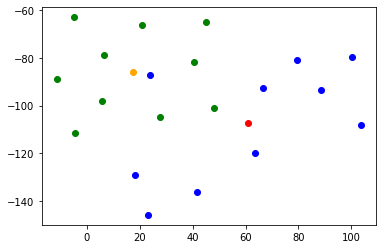

In [ ]:
plt.scatter(embeddings_en_2d[0][:, 0], embeddings_en_2d[0][:, 1], c = 'blue')
plt.scatter(embeddings_en_2d[1][:, 0], embeddings_en_2d[1][:, 1], c = 'green')
plt.scatter(x_cord, y_cord, c = 'red')
plt.scatter(x_cord2, y_cord2, c = 'orange')
plt.show()

Generate Embedding Matrix

In [ ]:
vocabulary = list(reddit_w2v.wv.vocab.keys())
vocabulary_glove = list(glove.wv.vocab.keys())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


Neural Network

Average text length (Important for how long should be the LSTM vector)

In [ ]:
X_train, X_val = train_test_split(train, test_size = 0.2, 
                                  random_state=42, shuffle=True, 
                                  stratify=train['label'])

In [ ]:
X = X_train['comment'].values
X_subreddit = X_train['subreddit'].values

X_val_data = X_val['comment'].values
X_val_subreddit = X_val['subreddit'].values

In [ ]:
X[1], X_subreddit[1]

('dabble Diana play certainly -PRON- want play -PRON- chroma -PRON- good skin .',
 'leagueoflegends')

In [ ]:
train_list = []
for i in range(0, len(X)):
  s = str(X[i])
  train_list.append(s)

train_list_subreddit = []
for i in range(0, len(X_subreddit)):
  s = str(X_subreddit[i])
  train_list_subreddit.append(s)

In [ ]:
val_list = []
for i in range(0, len(X_val_data)):
  s = str(X_val_data[i])
  val_list.append(s)

val_list_subreddit = []
for i in range(0, len(X_val_subreddit)):
  s = str(X_val_subreddit[i])
  val_list_subreddit.append(s)

In [ ]:
y = X_train['label'].values
y_val = X_val['label'].values

In [ ]:
filters='-PRON-'

In [ ]:
subreddit_train_np = tf.convert_to_tensor(train_list_subreddit)
subreddit_val_np = tf.convert_to_tensor(val_list_subreddit)

In [ ]:
voc_text_vec = list(dict.fromkeys(train_list_subreddit))

Neural Network Inputs

In [ ]:
max_length = 25
trunc_type='post'
oov_tok = "<OOV>"
padding = 'pre'

a = len(vocabulary) + 1


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = a, oov_token=oov_tok, filters= filters)

tokenizer.fit_on_texts(train_list)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_list)

padded_sequences = pad_sequences(sequences, 
                                 maxlen=max_length, padding = padding, 
                                 truncating=trunc_type)

sequences_val = tokenizer.texts_to_sequences(val_list)
padded_sequences_val = pad_sequences(sequences_val, 
                                 maxlen=max_length, padding = padding, 
                                 truncating=trunc_type)

In [ ]:
padded_sequences_val[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,  408,    2,  264,    2,
       2886, 2930,  339], dtype=int32)

In [ ]:
golve_embedding_layer = glove.wv.get_keras_embedding(train_embeddings=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
word2vec_embedding_layer = reddit_w2v.wv.get_keras_embedding(train_embeddings=False)

In [ ]:
vectorize_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=None, standardize=None,
    split=None, ngrams=None, output_mode='int',
    output_sequence_length=None, pad_to_max_tokens=False, vocabulary=voc_text_vec)

In [ ]:
x_input = tf.keras.Input(shape=(25,))
embedded_sequences = word2vec_embedding_layer(x_input)
seq = tf.keras.layers.LSTM(25)(embedded_sequences)
seq = tf.keras.layers.Dense(1, 'sigmoid')(seq)

x_subreddit = tf.keras.Input(shape=(1,), dtype=tf.string)
x_subreddit_vector = vectorize_layer(x_subreddit)
x_s = tf.keras.layers.Dense(1, 'sigmoid')(x_subreddit_vector)

#embedded_sequences = golve_embedding_layer(x_input)

x = tf.keras.layers.Add()([seq, x_s])
output = tf.keras.layers.Dense(1, 'sigmoid')(x)

model = tf.keras.Model([x_input, x_subreddit], output)
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['acc', tf.keras.metrics.AUC()])

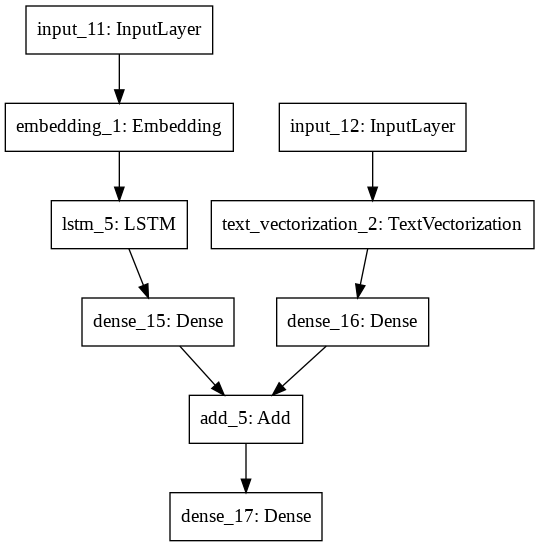

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=1, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)

In [ ]:
print(tf.__version__)

2.6.0


In [ ]:
nn = model.fit([padded_sequences, subreddit_train_np], y, 
           epochs=10, batch_size=64,
           validation_data = ([padded_sequences_val, subreddit_val_np], y_val),
           #validation_split = 0.2,
           callbacks = [early], shuffle = True)

Epoch 1/10
10109/10109 [==============================] - 285s 28ms/step - loss: 0.6874 - acc: 0.5441 - auc_6: 0.5610 - val_loss: 0.6849 - val_acc: 0.5545 - val_auc_6: 0.5731
Epoch 2/10
10109/10109 [==============================] - 271s 27ms/step - loss: 0.6825 - acc: 0.5609 - auc_6: 0.5832 - val_loss: 0.6834 - val_acc: 0.5587 - val_auc_6: 0.5810
Epoch 3/10
10109/10109 [==============================] - 263s 26ms/step - loss: 0.6801 - acc: 0.5665 - auc_6: 0.5914 - val_loss: 0.6817 - val_acc: 0.5612 - val_auc_6: 0.5857
Epoch 4/10
10109/10109 [==============================] - 264s 26ms/step - loss: 0.6784 - acc: 0.5703 - auc_6: 0.5971 - val_loss: 0.6820 - val_acc: 0.5614 - val_auc_6: 0.5871


In [ ]:
test = pd.read_csv('/content/test_reddit-3.csv')

In [ ]:
X_test = test['comment'].values
X_test_subreddit = test['subreddit'].values

In [ ]:
y_test = test['label'].values

In [ ]:
test_list = []
for i in range(0, len(X_test)):
  s = str(X_test[i])
  test_list.append(s)

test_list_subreddit = []
for i in range(0, len(X_test_subreddit)):
  s = str(X_test_subreddit[i])
  test_list_subreddit.append(s)

In [ ]:
sequences_test = tokenizer.texts_to_sequences(test_list)

padded_sequences_test = pad_sequences(sequences_test, 
                                 maxlen=max_length, padding = padding, 
                                 truncating=trunc_type)

subreddit_test_np = tf.convert_to_tensor(test_list_subreddit)

In [ ]:
y_hat_w2v = model.predict([padded_sequences_test, subreddit_test_np])

In [ ]:
y_hat_w2v_rounded = np.round(y_hat_w2v)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_hat_w2v_rounded))

              precision    recall  f1-score   support

           0       0.56      0.53      0.55    101083
           1       0.56      0.59      0.57    101083

    accuracy                           0.56    202166
   macro avg       0.56      0.56      0.56    202166
weighted avg       0.56      0.56      0.56    202166



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

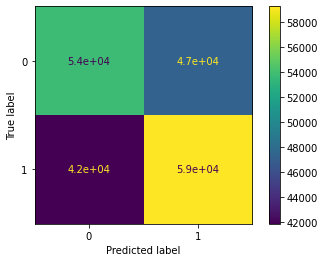

In [ ]:
cm = confusion_matrix(y_test, y_hat_w2v_rounded)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0,1])
disp.plot()

In [ ]:
cm

array([[63143, 37940],
       [47889, 53194]])

In [ ]:
cm

array([[53785, 47298],
       [41834, 59249]])

GloVe embedding

In [ ]:
vocabulary_glove = list(glove.wv.vocab.keys())

max_length = 25
trunc_type='post'
oov_tok = "<OOV>"
padding = 'pre'

a = len(vocabulary_glove)  + 1


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = a, oov_token=oov_tok, filters= filters)

tokenizer.fit_on_texts(train_list)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_list)

padded_sequences = pad_sequences(sequences, 
                                 maxlen=max_length, padding = padding, 
                                 truncating=trunc_type)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
x_input = tf.keras.Input(shape=(25,))
embedded_sequences = golve_embedding_layer(x_input)
seq = tf.keras.layers.LSTM(25)(embedded_sequences)
seq = tf.keras.layers.Dense(1, 'sigmoid')(seq)

x_subreddit = tf.keras.Input(shape=(1,), dtype=tf.string)
x_subreddit_vector = vectorize_layer(x_subreddit)
x_s = tf.keras.layers.Dense(1, 'sigmoid')(x_subreddit_vector)



x = tf.keras.layers.Add()([seq, x_s])
output = tf.keras.layers.Dense(1, 'sigmoid')(x)

model_glove = tf.keras.Model([x_input, x_subreddit], output)
model_glove.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['acc', tf.keras.metrics.AUC()])

In [ ]:
nn_glove = model_glove.fit([padded_sequences, subreddit_train_np], y, 
           epochs=10, batch_size=64,
           validation_data = ([padded_sequences_val, subreddit_val_np], y_val),
           #validation_split = 0.2,
           callbacks = [early], shuffle = True)

Epoch 1/10
10109/10109 [==============================] - 270s 27ms/step - loss: 0.6881 - acc: 0.5416 - auc: 0.5578 - val_loss: 0.6864 - val_acc: 0.5476 - val_auc: 0.5711
Epoch 2/10
10109/10109 [==============================] - 267s 26ms/step - loss: 0.6841 - acc: 0.5547 - auc: 0.5769 - val_loss: 0.6834 - val_acc: 0.5562 - val_auc: 0.5796
Epoch 3/10
10109/10109 [==============================] - 271s 27ms/step - loss: 0.6819 - acc: 0.5612 - auc: 0.5856 - val_loss: 0.6828 - val_acc: 0.5576 - val_auc: 0.5829
Epoch 4/10
10109/10109 [==============================] - 280s 28ms/step - loss: 0.6801 - acc: 0.5663 - auc: 0.5918 - val_loss: 0.6819 - val_acc: 0.5593 - val_auc: 0.5851
Epoch 5/10
10109/10109 [==============================] - 326s 32ms/step - loss: 0.6787 - acc: 0.5696 - auc: 0.5965 - val_loss: 0.6817 - val_acc: 0.5600 - val_auc: 0.5864
Epoch 6/10
10109/10109 [==============================] - 263s 26ms/step - loss: 0.6776 - acc: 0.5730 - auc: 0.6004 - val_loss: 0.6813 - val_acc:

In [ ]:
sequences_test = tokenizer.texts_to_sequences(test_list)

padded_sequences_test = pad_sequences(sequences_test, 
                                 maxlen=max_length, padding = padding, 
                                 truncating=trunc_type)

In [ ]:
y_hat_glove = model_glove.predict([padded_sequences_test, subreddit_test_np])

In [ ]:
y_hat_glove_rounded = np.round(y_hat_glove)

print(classification_report(y_test, y_hat_glove_rounded))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57    101083
           1       0.56      0.55      0.56    101083

    accuracy                           0.56    202166
   macro avg       0.56      0.56      0.56    202166
weighted avg       0.56      0.56      0.56    202166



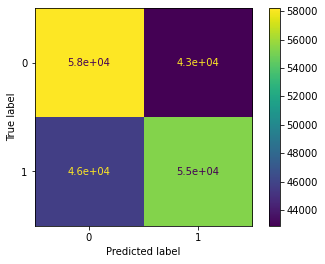

In [ ]:
cm = confusion_matrix(y_test, y_hat_glove_rounded)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0,1])
disp.plot()

In [ ]:
cm = confusion_matrix(y_test, y_hat_glove_rounded)
cm

array([[58192, 42891],
       [45721, 55362]])

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat_w2v, pos_label=1)
fpr_glove, tpr_glove, thresholds_glove = roc_curve(y_test, y_hat_glove, pos_label=1)

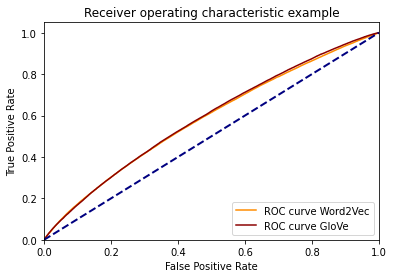

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', label='ROC curve Word2Vec')
plt.plot(fpr_glove, tpr_glove, color='darkred', label='ROC curve GloVe')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
glove_val_acc = nn_glove.history['val_acc']
w2v_val_acc = nn.history['val_acc']

glove__acc = nn_glove.history['acc']
w2v__acc = nn.history['acc']

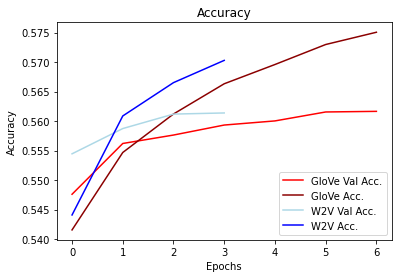

In [ ]:
plt.plot(glove_val_acc, color = 'red', label = 'GloVe Val Acc.')
plt.plot(glove__acc, color = 'darkred', label = 'GloVe Acc.')
plt.plot(w2v_val_acc, color = 'lightblue', label = 'W2V Val Acc.')
plt.plot(w2v__acc, color = 'blue', label = 'W2V Acc.')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(loc="lower right")
plt.show()